In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [11]:
df['region'].replace({'southeast':'SouthEast','southwest':'SouthWest','northeast':'NorthEast','northwest':'NorthWest'},inplace=True)

<ipython-input-11-1cd06c9520ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].replace({'southeast':'SouthEast','southwest':'SouthWest','northeast':'NorthEast','northwest':'NorthWest'},inplace=True)


In [12]:
df['region']

,region
0,SouthWest
1,SouthEast
2,SouthEast
3,NorthWest
4,NorthWest
...,...
1333,NorthWest
1334,NorthEast
1335,SouthEast
1336,SouthWest


In [13]:
df['region']= df['region'].astype('category')
df['sex']= df['sex'].astype('category')
df['smoker']= df['smoker'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,SouthWest,16884.92400
1,18,male,33.770,1,no,SouthEast,1725.55230
2,28,male,33.000,3,no,SouthEast,4449.46200
3,33,male,22.705,0,no,NorthWest,21984.47061
4,32,male,28.880,0,no,NorthWest,3866.85520


In [16]:
df['sex_num']= df['sex'].map({'female':1,'male':0})
df['smoker_num']= df['smoker'].map({'yes':1,'no':0})

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num
0,19,female,27.900,0,yes,SouthWest,16884.92400,1,1
1,18,male,33.770,1,no,SouthEast,1725.55230,0,0
2,28,male,33.000,3,no,SouthEast,4449.46200,0,0
3,33,male,22.705,0,no,NorthWest,21984.47061,0,0
4,32,male,28.880,0,no,NorthWest,3866.85520,0,0


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_num', 'smoker_num'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=1338, step=1)

In [21]:
df.shape

(1338, 9)

Box Plot Visualizer

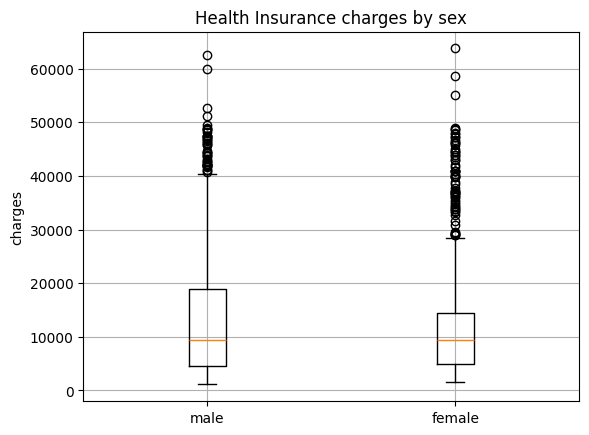

In [22]:
plt.boxplot([df[df['sex'] == 'male']['charges'], df[df['sex'] == 'female'] ['charges'] ])
plt.xticks([1,2],['male','female'])
plt.title('Health Insurance charges by sex')
plt.grid()
plt.ylabel('charges')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         1338 non-null   int64   
 1   sex         1338 non-null   category
 2   bmi         1338 non-null   float64 
 3   children    1338 non-null   int64   
 4   smoker      1338 non-null   category
 5   region      1338 non-null   category
 6   charges     1338 non-null   float64 
 7   sex_num     1338 non-null   category
 8   smoker_num  1338 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 49.2 KB


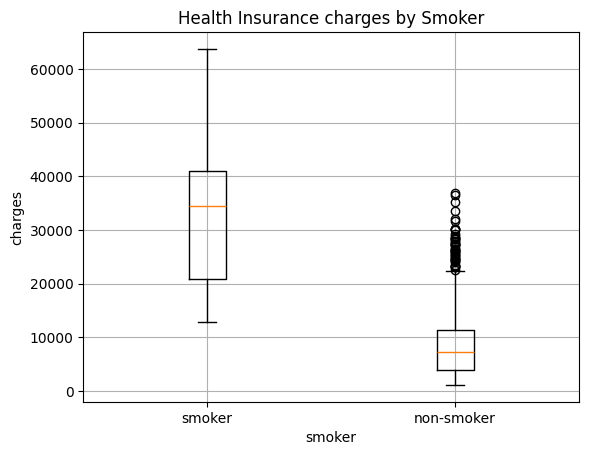

In [26]:
plt.boxplot([df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no'] ['charges'] ])
plt.xticks([1,2],['smoker','non-smoker'])
plt.title('Health Insurance charges by Smoker')
plt.grid()
plt.ylabel('charges')
plt.xlabel('smoker')
plt.show()

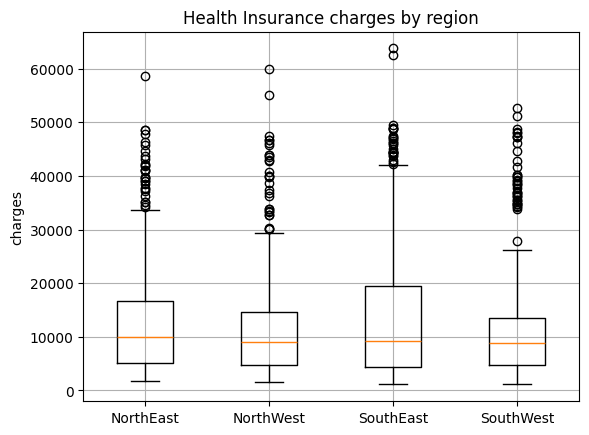

In [29]:
plt.boxplot([df[df['region'] == 'NorthEast']['charges'], df[df['region'] == 'NorthWest'] ['charges'],df[df['region'] == 'SouthEast'] ['charges'],df[df['region'] == 'SouthWest'] ['charges']])
plt.xticks([1,2,3,4],['NorthEast','NorthWest','SouthEast','SouthWest'])
plt.title('Health Insurance charges by region')
plt.grid()
plt.ylabel('charges')
plt.show()